In [253]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
# List everything in MyDrive
!ls /content/drive/MyDrive/

'Colab Notebooks'			      resumejun.pdf
'Copy of DSA for PLACEMENTS.gsheet'	      sample_100k.csv
 Dehradun_Eco_Spots_Template.gsheet	      spam.csv
 Dehradun_Eco_Spots_Template.xlsx	     'Time and Work Lesson 8.gvid'
'Eligibility Decalaration Form (1).gdoc'     'Untitled design.mp4'
'Eligibility Decalaration Form.gdoc'	     'Untitled spreadsheet.gsheet'
'Object Oriented Programmings (2) (4).gdoc'  'vaishnavi resume.pdf'
 rba-dataset.csv			     'vaish_resume__2_ (1).pdf'
 resumejuly.pdf


In [255]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1') #latin 1 cause pandas default to utf -8


In [256]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [257]:
df.shape

(5572, 5)

In [258]:
#1. data cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. improvement
#7. website and deploy

# **1.Data Cleaning**

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [260]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [261]:
df.sample(5)

,v1,v2
800,spam,Last Chance! Claim ur å£150 worth of discount ...
1891,ham,Probably earlier than that if the station's wh...
1166,ham,I am not having her number sir
786,ham,It does it on its own. Most of the time it fix...
2917,ham,Thanks chikku..:-) gud nyt:-*


In [262]:
#renaming columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [263]:
from sklearn.preprocessing import LabelEncoder # assigns labeling in alphabetical order
encoder = LabelEncoder()

In [264]:
df['target'] = encoder.fit_transform(df['target'])

In [265]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [266]:
#missing values check
df.isnull().sum()

,0
target,0
text,0


In [267]:
#check for duplicates
print("Duplicates:", df.duplicated().sum())
print(df['target'].value_counts())

Duplicates: 403
target
0    4825
1     747
Name: count, dtype: int64


In [268]:
#remove duplicates
df = df.drop_duplicates(keep='first')
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [269]:
df.shape

(5169, 2)

In [270]:
print("Shape before:", (5572, 5))
print("Shape after:", df.shape)

Shape before: (5572, 5)
Shape after: (5169, 2)


# **2.EDA**

In [271]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [272]:
df['target'].value_counts()

,count
target,
0,4516
1,653


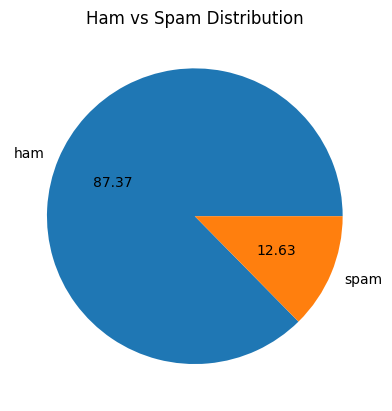

In [273]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.title('Ham vs Spam Distribution')
plt.show()

In [274]:
#we can analyse that data is imbalanced

In [275]:
import nltk

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)

# Creating 3 new  features
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

print("Features created!")
df.head()


Features created!


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [276]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [277]:
#describe for ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [278]:
#describe for spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


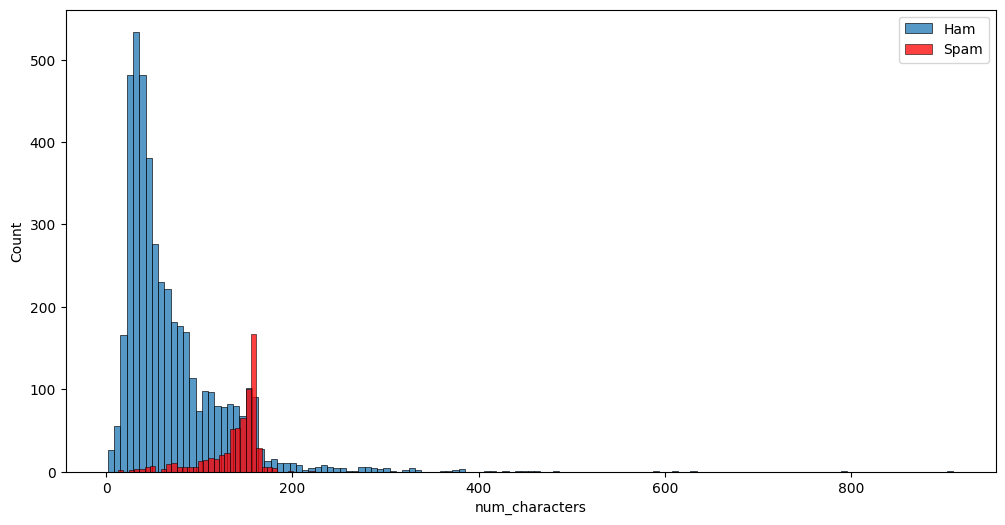

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], label='Ham')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Spam')

plt.legend()
plt.show()


<Axes: xlabel='num_words', ylabel='Count'>

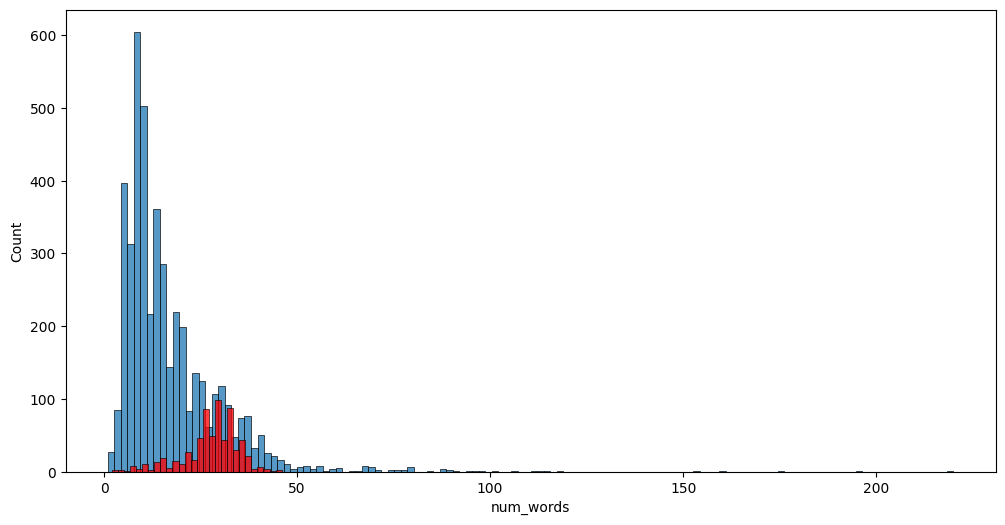

In [280]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

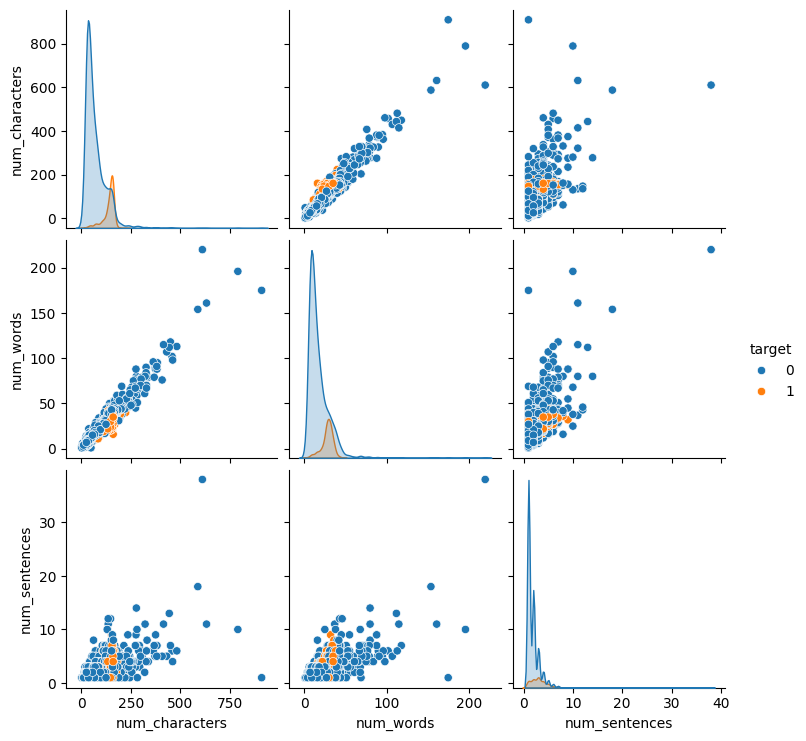

In [281]:
sns.pairplot(df, hue='target')

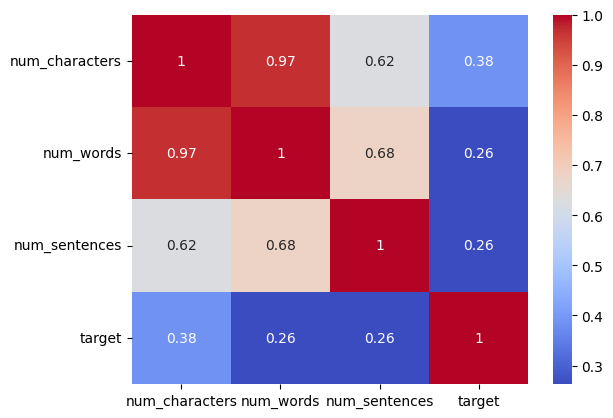

In [282]:
cols = ['num_characters', 'num_words', 'num_sentences', 'target']
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.show()


# **3**. **Text** **Preprocessing**


1.   Lower Case
2.   Tokenization
3.   Removing special characters
4.   Removing stop words and punctuation
5.   Stemming

In [283]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [284]:
print("Original:", df['text'][0])
print("Processed:", transform_text(df['text'][0]))

Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Processed: go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [285]:
transform_text('Did you like my presentation  presenting machine learning?')

'like present present machin learn'

In [286]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [287]:
from  wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [288]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

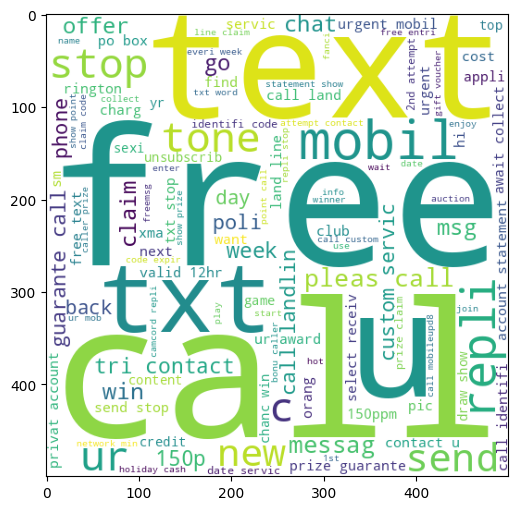

In [289]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

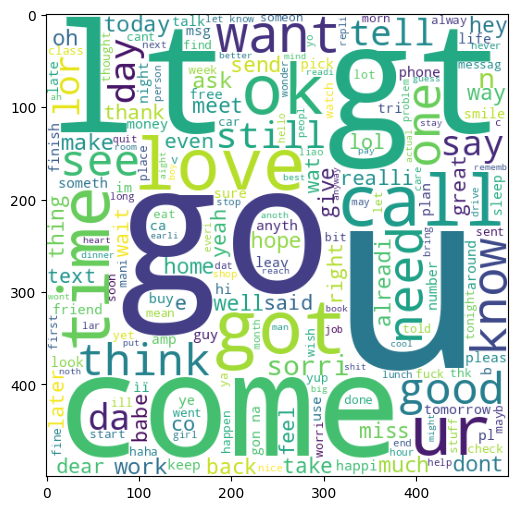

In [290]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [291]:
spam_corpus = []
for msg in df[ df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [292]:
len(spam_corpus)

9939

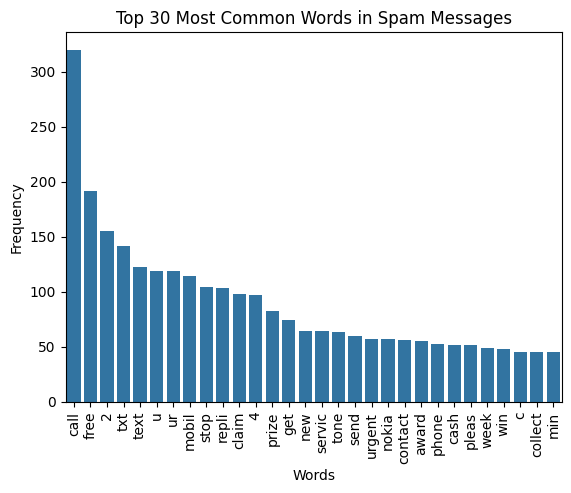

In [293]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame once
df1 = pd.DataFrame(Counter(spam_corpus).most_common(30),
                  columns=['word', 'frequency'])

# Plot
sns.barplot(x='word', y='frequency', data=df1)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Messages")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [294]:
print(df.columns)


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


In [295]:
ham_corpus =[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [296]:
len(ham_corpus)

35404

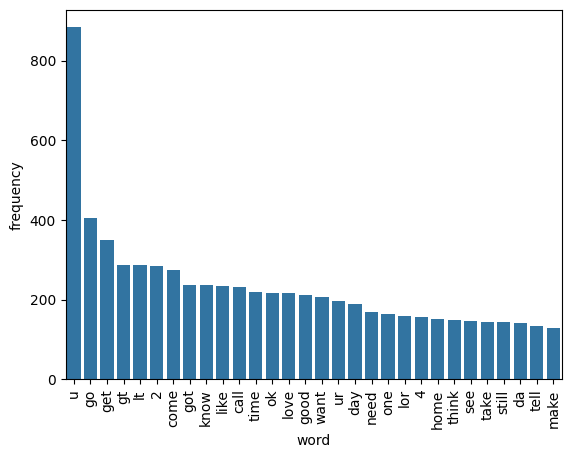

In [297]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df2 = pd.DataFrame(Counter(ham_corpus).most_common(30),
                  columns=['word', 'frequency'])

# Plot
sns.barplot(x='word', y='frequency', data=df2)
plt.xticks(rotation='vertical')
plt.show()

# **4**. **Model** **Building**

In [298]:
#Text vectorization needed
#using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [342]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [343]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [324]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [325]:
#X = np.hstack((X, df['num_characters'].values.reshape(-1,1)))


In [344]:
X.shape

(5169, 3000)

In [345]:
Y = df['target'].values

In [328]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [347]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [348]:
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))
print(precision_score(Y_test, y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [349]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, y_pred2))
print(confusion_matrix(Y_test, y_pred2))
print(precision_score(Y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [350]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, y_pred3))
print(confusion_matrix(Y_test, y_pred3))
print(precision_score(Y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [334]:
#we chose tfidf and mnb because presision matters here more because of imbalanced data

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [336]:

knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [337]:
clfs = {
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc}

In [338]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [339]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.8868471953578336
Precision -  0.8620689655172413
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9508196721311475
For  DT
Accuracy -  0.9487427466150871
Precision -  0.897196261682243
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771


In [340]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
4,RF,0.972921,0.982456
3,LR,0.967118,0.964286
1,NB,0.972921,0.950820
2,DT,0.948743,0.897196
0,KN,0.886847,0.862069


In [341]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
1,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
2,NB,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820
3,DT,0.948743,0.897196,0.948743,0.897196,0.948743,0.897196,0.948743,0.897196
4,KN,0.886847,0.862069,0.886847,0.862069,0.886847,0.862069,0.886847,0.862069


In [351]:
def predict_spam(msg):
    msg = transform_text(msg)
    vector = tfidf.transform([msg])
    result = mnb.predict(vector)[0]
    return "Spam" if result == 1 else "Ham"


In [352]:
predict_spam("Congratulations! You have won a FREE lottery ticket worth ₹10,00,000Call now to claim your prize.")


'Spam'

In [353]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
predict_spam("Urgent! Call now to claim reward")

'Spam'